# Sunlight Foundation | LGBTQ Trend Report

1. [URL set](#section_1)
2. [Content Analysis Framework](#section_2)
  1. Term Definition
  2. Getting counts
  3. Result Analysis


In [5]:
import scripts.get_content as gc
import scripts.analysis as a
import pandas as pd
import numpy as np
import nltk
import csv
import os

#nltk.download('punkt')
#nltk.download('stopwords')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<a id='section_1'></a>
## 1. Constructing URL set

We got the URLs that results from searches on usa.gov's search engine on a list of terms (term_search). Then, we combined them with some previosuly wip-identified urls and then performed a visual inspection to remove any urls that our code was not able to capture (13 urls out of 295 urls). The final output from this inspection for the next section of this analysis is named links_final.csv (in the inputs folder).

In [53]:
term_search = ['lgbtq', 'lgbt', 'transgender', 'gay', 'lesbian', 'bisexual', 'queer']
usagov_search = gc.gen_usagovsearch(term_search, 5)
# this function also saves the usagov search pages in a csv in the inputs folder
potential_urls, exceptions = gc.get_hrefs(usagov_search)
# uncomment following two lines to see ouput in csv
#potential_df = pd.DataFrame(list(potential_urls))
#potential_df.to_csv('inputs/potential_urls.csv')

In [54]:
# we use the urls that were previously identified by wip
wip_urls = gc.read_csv('inputs/wip_identified.csv')
wip_urls = [url[0] for url in wip_urls]
wip_urls = set(wip_urls)
final_links = list(wip_urls.union(potential_urls))
df_links = pd.DataFrame(final_links)
df_links.to_csv('inputs/final_urls_for_visual_check.csv')

<a id='section_2'></a>
## 2. Content Analysis

#### A. Term definition

These terms were collected from: 
1. https://www.edi.nih.gov/people/sep/lgbti/safezone/terminology
2. https://www.nap.edu/read/13128/chapter/12
3. https://www.lgbthealtheducation.org/wp-content/uploads/LGBT-Glossary_March2016.pdf

In [38]:
# define one word terms here
one_word_terms = [
                 'agender',
                 'ally',
                 'aromantic',
                 'asexual',
                 'biphobia',
                 'bisexual',
                 'cisgender',
                 'gay',
                 'gender',
                 'genderqueer',
                 'glbt',
                 'heteronormativity',
                 'heterosexism',
                 'heterosexual',
                 'hiv',
                 'homophobia',
                 'intersex',
                 'lesbian',
                 'lgb',
                 'lgbt',
                 'lgbtq',
                 'msm',
                 'outing',
                 'pangender',
                 'pansexual',
                 'polyamorous',
                 'queer',
                 'questioning',
                 'serostatus',
                 'sex',
                 'straight',
                 'transexual',
                 'transgender',
                 'transgenderist',
                 'transsexual',
                 'wsw'
                 ]
# define multi word terms here
two_word_terms =  [
                 ['assigned', 'sex'],
                 ['drag', 'queen'],
                 ['drag', 'king'],
                 ['gender', 'expression'],
                 ['gender', 'identity'],
                 ['gender', 'nonconforming'],
                 ['gender', 'role'],
                 ['gender', 'minority'],
                 ['gender', 'dysphoria'],
                 ['gender', 'fluid'],
                 ['gender', 'binary'],
                 ['hormone', 'therapy'],
                 ['same-sex', 'marriage'],
                 ['same-sex', 'relationship'],
                 ['same-sex', 'couple'],
                 ['same-sex', 'couples'],
                 ['same-sex', 'attraction'],
                 ['sex', 'minority'],
                 ['sex', 'reassignment'],
                 ['sexual', 'orientation'],
                 ['two', 'spirit']]
# if any of the previous terms are also control terms, declare them here:
ctrl_terms = ['heterosexual', 'straight']

#### B. Getting counts

This function gets the total number of times that each term appears in the visible body of text of 

In [99]:
terms = one_word_terms + multi_word_terms
# change dates here (e.g. Pre-post Trump)
dates_pre = [2013, 1, 20, 2017, 1, 19]
dates_post = [2017, 1, 20, 2019, 8, 8]
output_name = 'counts_final'
gc.get_output('inputs/links_final.csv', output_name, terms, dates_pre, dates_post, store_text=True)

#### C. Analyzing results

In [59]:
# define output name for output files
output_name = 'counts_final'
# if the analysis is by department, add department names here
department_path = 'inputs/departments_final.csv'
# get dataframes from stored objects (pickle files)
df_pre_merged, df_post_merged, col_names = a.get_final_df(department_path, multi_word_terms, one_word_terms, output_name)
# put any inconsistent ids here (after some visual inspection)
inconsistencies = [23, 90, 146, 273]
df_pre_merged = df_pre_merged[~df_pre_merged.id.isin(inconsistencies)]
df_post_merged = df_post_merged[~df_post_merged.id.isin(inconsistencies)]
# get relative and absolute changes
rel_changes, rel_pre, rel_post = a.get_changes(df_pre_merged, df_post_merged, 'id', col_names, 'ttal', ctrl_terms, pctg=True)
abs_changes = a.get_changes(df_pre_merged, df_post_merged, 'id', col_names, 'ttal', ctrl_terms, pctg=False)
#abs_changes.to_csv('images/fig1_data.csv')s
#rel_changes.to_csv('images/fig2_data.csv')

# uncomment to check relative frequencies and save results
#df_pre_merged.to_csv('outputs/pre_data.csv')
#df_post_merged.to_csv('outputs/post_data.csv')
#rel_pre.sort_values()
#rel_post.sort_values()

The relative number of terms changed 0.95 %, from 0.0505 to 0.0510, excluding ['heterosexual', 'straight']
The absolute number of terms changed 1.19 %, from 8227 to 8325, excluding ['heterosexual', 'straight']


In [60]:
a.display_side_by_side(rel_changes, abs_changes)

,term,change
0,same-sex couple,-100.00
1,same-sex relationship,-100.00
2,queer,-11.61
3,msm,-8.92
4,questioning,-8.12
5,glbt,-6.11
6,intersex,-5.49
7,lesbian,-3.75
8,gay,-2.73
9,sex,-2.66


*Absolute changes*

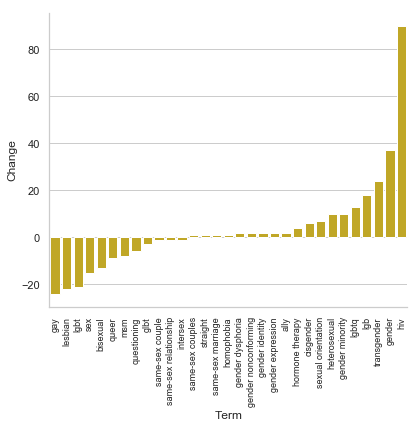

In [61]:
a.plot_bars(abs_changes, 'term', 'change')

*Relative changes*

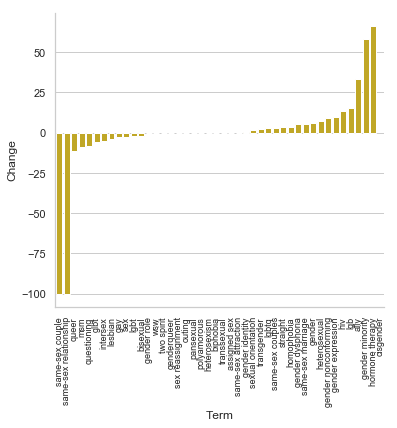

In [62]:
a.plot_bars(rel_changes, 'term', 'change')

*Changes by Department*

HHS is the Department with most pages in the set that we analyzed. The whole HHS domain is analyzed in the report using this same script but with the 

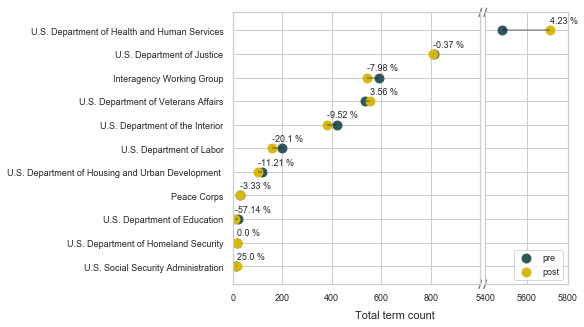

In [63]:
df = a.plot_dpt_changes(df_pre_merged, df_post_merged, col_names, ctrl_terms)
df.to_csv('images/fig3_data.csv')

*Absolute Changes in Terms by Department*

Plots of the absolute changes by department with most changes.

In [64]:
department_list = ['U.S. Department of Health and Human Services',
                   'U.S. Department of the Interior',
                   'U.S. Department of Labor',
                   'U.S. Department of Housing and Urban Development ',
                   'U.S. Department of Education',
                   'Interagency Working Group',
                   'U.S. Department of Veterans Affairs',
                   'U.S. Department of Justice',
                   'Peace Corps',
                   'U.S. Social Security Administration']
department_pos = ['U.S. Department of Health and Human Services', 
                  'U.S. Department of Veterans Affairs', 
                  'U.S. Social Security Administration']
department_neg = ['U.S. Department of Justice',
                  'Interagency Working Group',
                  'U.S. Department of the Interior',
                  'U.S. Department of Labor',
                  'U.S. Department of Housing and Urban Development ',
                  'U.S. Department of Education']

U.S. Department of Health and Human Services
The absolute number of terms changed 4.23 %, from 5480 to 5712, excluding ['heterosexual', 'straight']
U.S. Department of Veterans Affairs
The absolute number of terms changed 3.56 %, from 534 to 553, excluding ['heterosexual', 'straight']
U.S. Social Security Administration
The absolute number of terms changed 25.00 %, from 12 to 15, excluding ['heterosexual', 'straight']


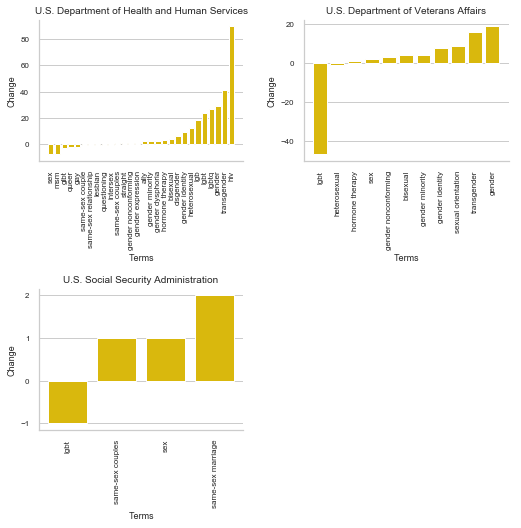

In [65]:
a.plot_changes_dept(df_pre_merged, df_post_merged, col_names, ctrl_terms, department_pos)

U.S. Department of Justice
The absolute number of terms changed -0.37 %, from 811 to 808, excluding ['heterosexual', 'straight']
Interagency Working Group
The absolute number of terms changed -7.98 %, from 589 to 542, excluding ['heterosexual', 'straight']
U.S. Department of the Interior
The absolute number of terms changed -9.52 %, from 420 to 380, excluding ['heterosexual', 'straight']
U.S. Department of Labor
The absolute number of terms changed -20.10 %, from 199 to 159, excluding ['heterosexual', 'straight']
U.S. Department of Housing and Urban Development 
The absolute number of terms changed -11.21 %, from 116 to 103, excluding ['heterosexual', 'straight']
U.S. Department of Education
The absolute number of terms changed -57.14 %, from 21 to 9, excluding ['heterosexual', 'straight']


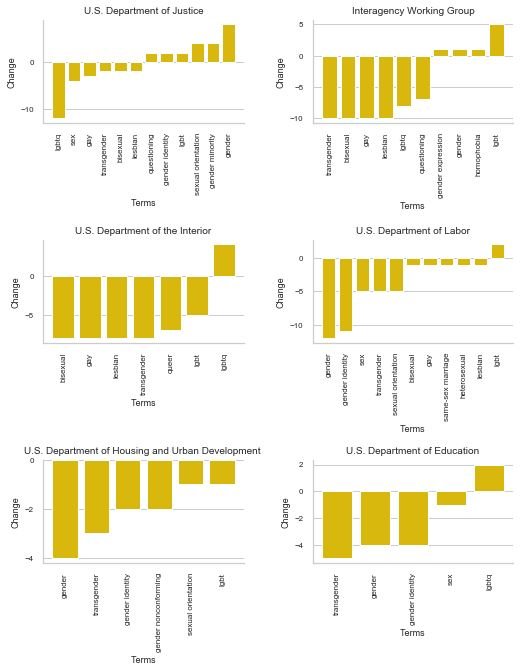

In [69]:
# peace corps is not plotted here
a.plot_changes_dept(df_pre_merged, df_post_merged, col_names, ctrl_terms, department_neg)

In [ ]:
# Religious freedom terms
one_word_terms = [
'faith',
'faithbased',
'other',
'often',
'god'
]
multi_word_terms =  [
['religious', 'freedom'],
['religious', 'liberty'],
['religious', 'freedoms'],
['religious', 'liberties'],
['conscience', 'protection'],
['freedom', 'of', 'religion'],
['faithbased', 'and', 'community', 'organizations'],
['faithbased', 'and', 'community', 'organization'],
['faith', 'based'],
['community', 'organizations'],
['faithbased', 'organizations'],
['faith', 'based', 'organizations'],
['White', 'House', 'Faith', 'and', 'Opportunity', 'Initiative'],
['Faith', 'and', 'Opportunity', 'Initiative'],
['Centers', 'for', 'Faith', 'and', 'Opportunity', 'Initiatives']
    ]
control_terms = ['risky', 'until'] 